# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.


## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of similar sale prices.

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/1gGeugZrafdi4_6Qle25pMj9PVJH0h_M7aMpvmuebIwA/edit#gid=1014563132

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Import the training and validation sets

df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                parse_dates=['saledate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

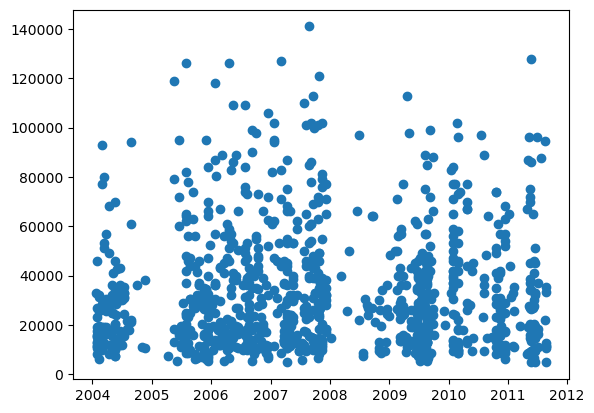

In [19]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

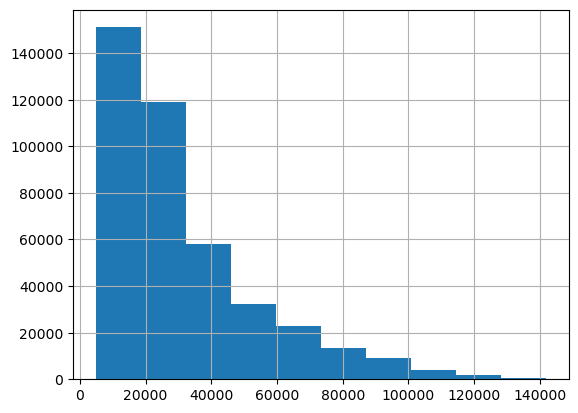

In [12]:
df.SalePrice.hist();

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the 'parse_dates' parameter.

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [20]:
# Sort DataFrame in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)

df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
205615      1974                       NaN       NaN 1989-01-17  ...   
274835      1980                       NaN       NaN 1989-01-31  ...   
141296      1978                       NaN       NaN 1989-01-31  ...   
212552      1980                       NaN       NaN 1989-01-31  ...   
62755       1984                       NaN       NaN 1989-01-31  ...   

       Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer  \
205615                     NaN          NaN   NaN             NaN   
274835                     NaN          NaN   NaN             NaN   
141296                     NaN          NaN   NaN             NaN   
212552                     NaN          NaN   NaN             NaN   
62755                      NaN          NaN   NaN             NaN   

       Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
205615          NaN  None or Unspecified   Straight  None or Unspecified   
274835          NaN                  NaN        NaN                  NaN   
141296          NaN  None or Unspecified   Straight  None or Unspecified   
212552          NaN                  NaN        NaN                  NaN   
62755           NaN  None or Unspecified        PAT                Lever   

       Differential_Type Steering_Controls  
205615               NaN               NaN  
274835          Standard      Conventional  
141296               NaN               NaN  
212552          Standard      Conventional  
62755                NaN               NaN  

[5 rows x 53 columns]

### Make a copy of the original DataFrame

We make a copy of the dataframe so that when we manipulate data we always have a version to go back to.

In [21]:
# Make a copy

df_tmp = df.copy()